In [1]:
from Taweret import toy_model_SAMBA as toy_models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
m1 = toy_models.loworder(5)
m2 = toy_models.highorder(5)
truth = toy_models.true_model()

In [3]:
g = np.linspace(0.01,1,100)
m1_prediction = m1.predict(g)
m2_prediction = m2.predict(g)
true_output = truth.predict(g)


In [4]:
fig, ax = plt.subplots()
ax.plot(g, m1_prediction[0].flatten(), label='low order')
ax.plot(g, m2_prediction[0].flatten(), label='high order')
ax.plot(g, true_output[0], label='truth')
ax.set_ylim(1.2,3.2)
ax.legend()

In [5]:
from Taweret.BMM import Linear_mix as LM


In [6]:
mix_model = LM(m2, m1, g, true_output[0], true_output[1], method='sigmoid')

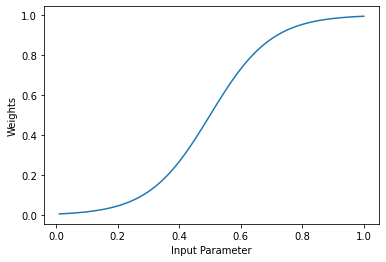

In [7]:
mix_model.plot_weights([0.5,0.1])

In [8]:
mix_model.mix_loglikelihood([0.5,0.1])

1.9224897771141511

In [9]:
mix_model.mix_loglikelihood_test([0.5,0.1])

1.922489777114151

In [12]:
sw = np.linspace(0,1,100)
likelihood = np.array([mix_model.mix_loglikelihood([s, 1]) for s in sw]).flatten()
fig, ax = plt.subplots()
ax.plot(sw,likelihood)

In [13]:
fig, ax = plt.subplots()
mix_prediction = mix_model.prediction([10,1],g)
ax.plot(g, m1_prediction[0].flatten(), label='low order')
ax.plot(g, m2_prediction[0].flatten(), label='high order')
ax.plot(g, mix_prediction.flatten(), label='BMM prediction')
ax.set_ylim(1.2,3.2)
ax.legend()